# Analysis Of Sales For 2011 

Here we will analyse the purchase data for 2011. 
We will try to showcase what influences the purchase decision of the customers by performing the regression analysis. 
We will analyse what are the patterns for each customer when making the purchase decision.

# General Overview Of Data & Data Preparation/Cleaning
 
We will see the general data and discover what information can be extracted from it. 

In [1]:
#import neccessary liabraries 

import pandas as pd 
import numpy as np 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt #plotting library



from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#Import the dataset as dataframe 
data=pd.read_csv("sales_data.csv",encoding='unicode_escape')
#Read the first 5 columns of the dataset 
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#Get the size of the dataset
data.shape

(541909, 8)

In [4]:
#Find the description of each columns and whatdatatype they contain
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#We see that Not all customer id s contain information.
#In order to have the most correct analysis of the dataset we should drop such values 
#First in order to keep the initial dataset intact we create a copy 

data2 = data.copy()
data2.dropna(inplace = True)
data2
# We Have created a dataframe data2 which does not contain any null values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB



Dataset contains 8 columns : 

'InvoiceNo' - Type is an object, meaning that it is a dataset object. Invocie number is something we can assume is repeated and used to identify the payments of the customers. 


'StockCode'- Unique code of each product, that identifies them. It might be reapetead multiple times in the table.

'Description' - What was the ordered product.

'Quantity' - How much product did the customer order. The type of the given parameter is INTEGER, we can assume that there are no half products that can be divided. QUANTITY CAN NOT  LESS THAN 0 


'InvoiceDate'- When did the order occur and is of type object which means we have to convert it to datetime to make our relevant calculations.

'UnitPrice'- Price of the product given in floats.Price for single unit bought by customer;

'CustomerID'- Unique ID of each customer in the company which means that we can group their orders.IS an int but its type id float so we have to change it


'Country'- Where did the order come from.



In [7]:
data2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data2['date_cleaned'] =  pd.to_datetime(data2['InvoiceDate'])
data2.tail()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  object        
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   date_cleaned  406829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [9]:
#Since Customer ID does not require to have decimal seperators to have the correct data type we convert it to INT
data2['CustomerID']=data2['CustomerID'].astype(int)

In [10]:
#Calculate the full price for the product orderddered since we have unit price :
data2['full_price'] = data2['UnitPrice']*data['Quantity']
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_cleaned,full_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34


In [11]:
# We need to check if the quantity ordered has any negative values
#since quantity can not be negative we have to remove such values

check = data2[data2['Quantity']<0]
check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_cleaned,full_price
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom,2010-12-01 09:41:00,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom,2010-12-01 09:49:00,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom,2010-12-01 10:24:00,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom,2010-12-01 10:24:00,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom,2010-12-01 10:24:00,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom,2011-12-09 09:57:00,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom,2011-12-09 10:28:00,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom,2011-12-09 11:57:00,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom,2011-12-09 11:58:00,-1.25


In [12]:
# We see that we have 8905 values in quantity that are negative so we have to remove them 
data2 = data2[data2['Quantity']>0]
data2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_cleaned,full_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,2011-12-09 12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,2011-12-09 12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,2011-12-09 12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,2011-12-09 12:50:00,16.60


In [13]:
#We have a dataset containing 397924 values overall left
data2.info()
data2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   InvoiceDate   397924 non-null  object        
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  int64         
 7   Country       397924 non-null  object        
 8   date_cleaned  397924 non-null  datetime64[ns]
 9   full_price    397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 33.4+ MB


(397924, 10)

In [14]:
data2.describe()

#Min Quantity sold = 1 unit Max = 80995 
#Average price per unit is = 3.12 
#Min Price is 0 meaning that some products were given for free
#Max price is 8142

,Quantity,UnitPrice,CustomerID,full_price
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [15]:
# We have 4339 unique customers 
customers = data2.CustomerID.unique()
len(customers)

4339

In [16]:
#We have 37 unique countries that we sell our products to
countries = data2.Country.unique()
len(countries)

37

In [17]:
#We have 3665 unique products that we sell
products = data2.StockCode.unique()
len(products)

3665

In [18]:
#We Offer 3887 unique descriptions of our products meaning that same produst might have different descriptions
#Based on which country we operate in or who our customer is 
desc = data2.Description.unique()
len(desc)

3877

# RFM Analysis 

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary Value – How much do they spend?

Recency = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1

Frequency = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1

Monetary = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

In [19]:
#Recency : How recently did the customer purchase from us. 
# We can take date_cleaned column sort the dates and customerIds relatively, 
#only leave those purchases for customers that are the most recent and drop others 
#We can find the most recent date for the date list and deduct dates from it, 
#and divide it by 12 to get the range for our dates and sort them 

In [20]:
#Find the most recent date: 2011, 12, 9 is the most recent date. 
#for the validity of the analysis we can take as max date the last day of 2011, 2011 - 12 - 31 
data2['date_cleaned'].max()

Timestamp('2011-12-09 12:50:00')

In [21]:
#This will show the order dates of customers

max_date = data2['date_cleaned'].max()
customer_order_dates = data2.groupby(['CustomerID'])['date_cleaned'].rank(method = 'min')

print(customer_order_dates) # List of customers ranked based on their order dates.

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
541904    38.0
541905    38.0
541906    38.0
541907    38.0
541908    38.0
Name: date_cleaned, Length: 397924, dtype: float64


In [22]:
# Rank is for each customer and their relevant date  from oldest to newest orders. Oldest being 1.
data3 = data2
data3['rank'] = data3.sort_values(['CustomerID','date_cleaned']).groupby(['CustomerID'])['date_cleaned'].rank(method='min').astype(int)
data3.sort_values(['CustomerID','rank'])


/var/folders/4d/8tkcz58x0md0_v7fj12j6ht80000gn/T/ipykernel_4874/463416629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['rank'] = data3.sort_values(['CustomerID','date_cleaned']).groupby(['CustomerID'])['date_cleaned'].rank(method='min').astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_cleaned,full_price,rank
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,2011-01-18 10:01:00,77183.60,1
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,12347,Iceland,2010-12-07 14:57:00,25.20,1
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,12347,Iceland,2010-12-07 14:57:00,17.00,1
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,12347,Iceland,2010-12-07 14:57:00,39.00,1
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,12347,Iceland,2010-12-07 14:57:00,23.40,1
...,...,...,...,...,...,...,...,...,...,...,...
392752,570715,22419,LIPSTICK PEN RED,12,10/12/2011 10:23,0.42,18287,United Kingdom,2011-10-12 10:23:00,5.04,30
392753,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,10/12/2011 10:23,2.10,18287,United Kingdom,2011-10-12 10:23:00,25.20,30
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,10/28/2011 9:29,1.25,18287,United Kingdom,2011-10-28 09:29:00,45.00,68
423940,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,10/28/2011 9:29,0.39,18287,United Kingdom,2011-10-28 09:29:00,18.72,68


In [23]:
#To find frequency we need to find for each customer the most recent purchase and when was it in terms of months
#I need to filter through customers and their ranks pick 
#the highest ranking date and deduct the most recent date from it
recency = data3[data3['rank']==1]
#recency

#For each customer the most recent order is visible.
recency = recency.drop(columns=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','full_price'])
#I just need unique customers to be left to make recency analysis


In [24]:
recency['Recent'] = max_date - recency['date_cleaned']

In [25]:
recency['Recent']=recency['Recent'].astype('timedelta64[M]')
recency

,CustomerID,Country,date_cleaned,rank,Recent
0,17850,United Kingdom,2010-12-01 08:26:00,1,12.0
1,17850,United Kingdom,2010-12-01 08:26:00,1,12.0
2,17850,United Kingdom,2010-12-01 08:26:00,1,12.0
3,17850,United Kingdom,2010-12-01 08:26:00,1,12.0
4,17850,United Kingdom,2010-12-01 08:26:00,1,12.0
...,...,...,...,...,...
541801,12713,Germany,2011-12-09 12:16:00,1,0.0
541802,12713,Germany,2011-12-09 12:16:00,1,0.0
541803,12713,Germany,2011-12-09 12:16:00,1,0.0
541804,12713,Germany,2011-12-09 12:16:00,1,0.0


In [26]:
recency = recency.drop_duplicates()

In [27]:
recency

,CustomerID,Country,date_cleaned,rank,Recent
0,17850,United Kingdom,2010-12-01 08:26:00,1,12.0
9,13047,United Kingdom,2010-12-01 08:34:00,1,12.0
26,12583,France,2010-12-01 08:45:00,1,12.0
46,13748,United Kingdom,2010-12-01 09:00:00,1,12.0
65,15100,United Kingdom,2010-12-01 09:09:00,1,12.0
...,...,...,...,...,...
536969,13436,United Kingdom,2011-12-08 10:33:00,1,0.0
537255,15520,United Kingdom,2011-12-08 10:58:00,1,0.0
538064,13298,United Kingdom,2011-12-08 13:11:00,1,0.0
538812,14569,United Kingdom,2011-12-08 14:58:00,1,0.0


/Users/md/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/md/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recent'>

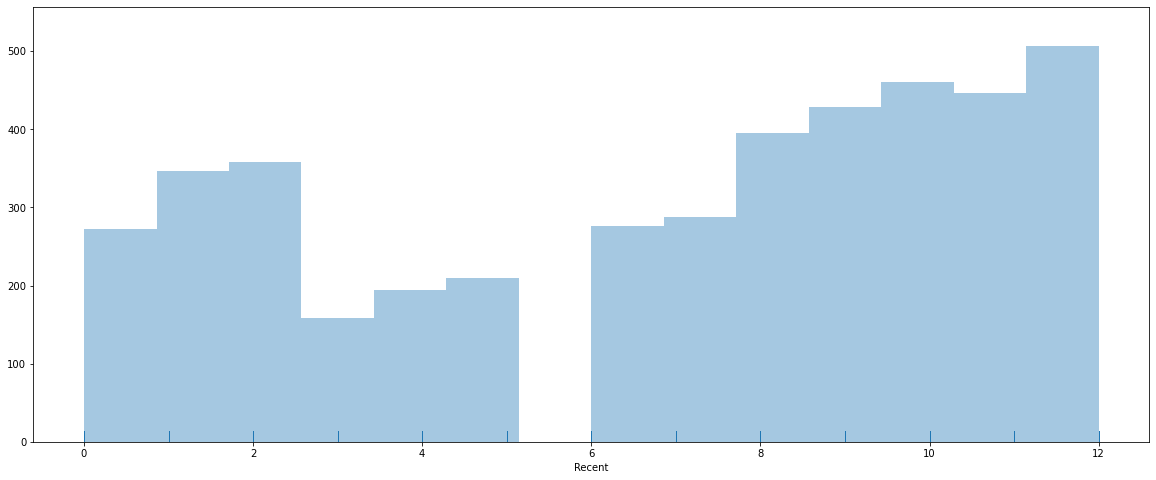

In [28]:
# We can see that our current customers numbers have fallen and we have a drop in between might 
#be because of data corupption or that during this period omething happened
plt.figure(figsize=(20,8))
sns.distplot(recency.Recent, kde = False, rug = True)

In [29]:
#Frequency is how many times one customer has ordered which we can find ot by counting the invoices per customer
freq = data3.drop_duplicates(subset=['InvoiceNo']).groupby(['CustomerID'])['InvoiceNo'].count()
freq= pd.DataFrame(freq).reset_index()
freq.rename(columns = {'InvoiceNo':'Frequency'}, inplace = True)

freq.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [30]:
#Monetary Value : Total value of money spent by the customer
mon = data3.groupby(['CustomerID'])['full_price'].sum()
mon= pd.DataFrame(mon).reset_index()
mon.rename(columns = {'full_price':'Monetary'}, inplace = True)
mon.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [31]:
#Full RFM in One place 
recency = recency.drop(columns=['Country','date_cleaned','rank'])
rfm = freq.merge(mon, on='CustomerID').merge(recency, on='CustomerID')
rfm.columns = ['CustomerId', 'freq', 'monetary', 'recency']
rfm.head()


,CustomerId,freq,monetary,recency
0,12346,1,77183.60,10.0
1,12347,7,4310.00,12.0
2,12348,4,1797.24,11.0
3,12349,1,1757.55,0.0
4,12350,1,334.40,10.0


In [32]:
rfm.describe()
#This values show that the minimum amount of order was one
#As for the montary we gave gifts to customers since min value is 0 
#On average customers pay 2053 for our products 

,CustomerId,freq,monetary,recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,4.271952,2053.793018,6.830145
std,1721.889758,7.705493,8988.248381,3.903038
min,12346.000000,1.000000,0.000000,0.000000
25%,13812.500000,1.000000,307.245000,3.000000
50%,15299.000000,2.000000,674.450000,8.000000
75%,16778.500000,5.000000,1661.640000,10.000000
max,18287.000000,210.000000,280206.020000,12.000000


/Users/md/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/md/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/md/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='monetary', ylabel='Density'>

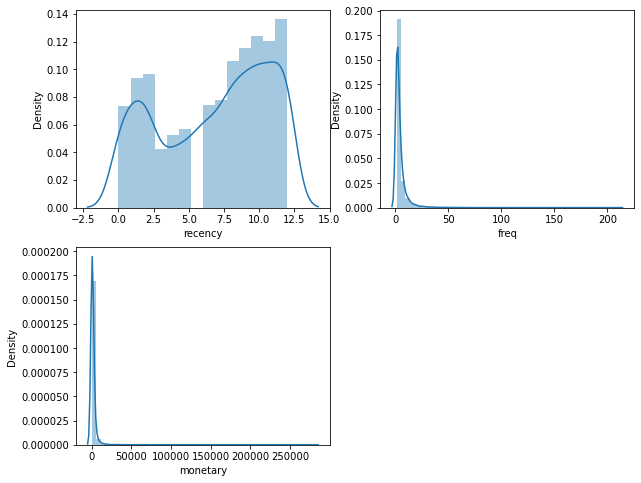

In [33]:

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.distplot(rfm['recency'])
plt.subplot(2, 2, 2)
sns.distplot(rfm['freq'])
plt.subplot(2, 2, 3)
sns.distplot(rfm['monetary'])

Frequency: 25% of our customers knows what they want and come and only get those items they want. They have though about their purchase. 
50% of our customers frequency of purchase is 2, which means they liked what we sold them and returned to buy again.75% bought from us 5 times which means they are loyal and enjoyed their first purchases and have returned. They are our loyal customers. 

Recency: 
Monetary: 25% of our customer base spends 0-300 on our products. 50% spends 300-700 on our products and 75% have spent -  700-1000 on our products, this are the clients who know our values and trust us to deliver on it.

# Customer Segmentation
In order to segment customers we need to give each RFM value a score. 

I will use 1 2 3 for each. Meaning that 1 is the best and 3 is the worst. 

Recency - The most recent the customer the better. Thus 3 is for the customers that bought from us in the past and have no recent purchase history. 1 is for the customers that have purchased from us most recently.

Frequency - The highre the frequency of purchase the better it means that customer is loyal and buys from us often: score of 1 means that customer has purchased from us most frequently and 3 means they have purchased from us the least. 

Monetary - the higher the score the better since it means customer sees value in our products and wants to purchase them: score of 1 is the best means that monetary value is high and score of 3 means customer is unwilling to pay more and does not see the value in the product.

In [34]:
#function that helps to define the scores based on the system described above
def get_group(Q1, Q2, Q3, value):
    if value <= Q1:
        return '3'
    elif Q1 < value <= Q2:
        return '2'
    elif Q2 <= value:
        return '1'

In [35]:
#Assign the Q values for the score evaluations
rece_Q1, rece_Q2, rece_Q3 = rfm['recency'].quantile([0.75,0.5,0.25])
freq_Q1, freq_Q2, freq_Q3 = rfm['freq'].quantile([0.25,0.5,0.75])
mone_Q1, mone_Q2, mone_Q3 = rfm['monetary'].quantile([0.25,0.5,0.75])

In [36]:
#Go over the RFM frequency values and for each value based on the function defined above assign RFM score
frequency = []

for i in range(len(rfm)):
    freq = rfm.iloc[i]['freq']
    frequency.append(get_group(freq_Q1, freq_Q2, freq_Q3, freq)) 

rfm['freq_group'] = frequency

#Do the same for monetary and recency
monetary_group = []

for i in range(len(rfm)):
    monetary = rfm.iloc[i]['monetary']
    monetary_group.append(get_group(mone_Q1, mone_Q2, mone_Q3, monetary)) 
    


rfm['monetary_group'] = monetary_group
#Use of pcut allows us to define scores based on quantiles 3 is the worst and 1 the best
rfm['recency_group'] = pd.qcut(rfm['recency'], 3, [1, 2, 3])

rfm['RFM Score'] = rfm['recency_group'].astype(str) + rfm['freq_group'].astype(str)+rfm['monetary_group'].astype(str)
rfm.tail()

,CustomerId,freq,monetary,recency,freq_group,monetary_group,recency_group,RFM Score
4334,18280,1,180.60,9.0,3,3,2,233
4335,18281,1,80.82,5.0,3,3,1,133
4336,18282,2,178.05,4.0,2,3,1,123
4337,18283,16,2094.88,11.0,1,1,3,311
4338,18287,3,1837.28,6.0,1,1,2,211


Customer Segment : 

best customer = Who buys a lot and spends the most -> 1/1/1  

Loyal customer = Who buys the most frequently -> x/1/x
Spends the most =RF-> "Monetary = 1"

New Potential Customers = recency is 1 and frequency and monetary are 2-> 1/2/2

Lost customers =  3/1/1  are not buying anymore but used to 




In [37]:
def getSegment (rfm):
    if rfm == "111": 
        return "BEST"
    if rfm =="212" or rfm =='213':
        return "LOYAL"
    if rfm == '221' or rfm =='211' or rfm == '121':
        return "MOST SPENDER"
    if rfm == '122' or rfm =='113':
        return "NEW POTENTIAL"
    if rfm == '311':
        return  "LOST"
    else: 
        return "OTHER"
        
rfm['Segment'] =  rfm['RFM Score'].apply(getSegment)  
rfm.tail()


,CustomerId,freq,monetary,recency,freq_group,monetary_group,recency_group,RFM Score,Segment
4334,18280,1,180.60,9.0,3,3,2,233,OTHER
4335,18281,1,80.82,5.0,3,3,1,133,OTHER
4336,18282,2,178.05,4.0,2,3,1,123,OTHER
4337,18283,16,2094.88,11.0,1,1,3,311,LOST
4338,18287,3,1837.28,6.0,1,1,2,211,MOST SPENDER


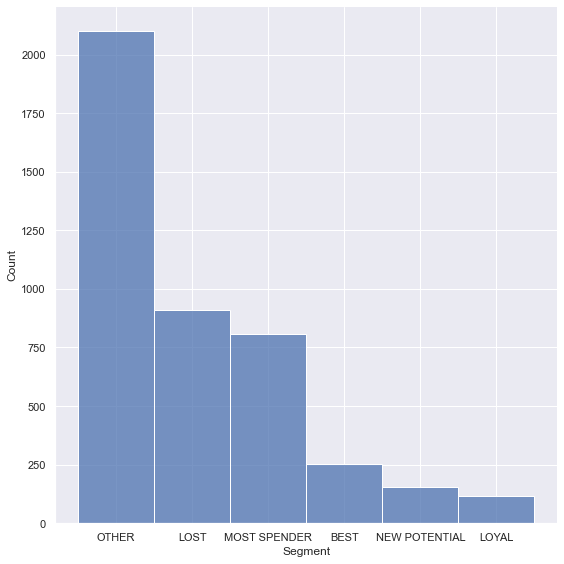

In [38]:
sns.set_theme(style="darkgrid")
sns.displot(
    rfm, x="Segment",
    binwidth=8, height=8, facet_kws=dict(margin_titles=True),
)

Based on RFM We can see that number of loyal customers is small compared to OTHER Types of customers and we need to investigate who they are and what makes their purchase decision

# Linear Regression 
For the linear regression analysis we create a table where we group invoices and sum the quantity and sales of the given Invoice. We will analyse how country and season has affect on the sales. 
We create the table Lasttable3 where we will show the relevant data grouped by invoice number. 
The model does not give us any valid information, since the correlation is low between sales and seasons and regions. 

In [88]:
data4 = data.copy()
data4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [89]:
#Returned Objects by the clients where the quantity is less than 0 
#In order to have clean data we will remove such values from the dataset
data4[data4['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [90]:
#For the regreesion i do not need descriptions and stock codes
data4 = data4.drop(columns=['StockCode','Description'])
data4.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [91]:
data4['InvoiceDate'] = pd.to_datetime(data4['InvoiceDate'])
data4.dropna(inplace = True)
data4['CustomerID'] = data4.CustomerID.astype(int)
data4 = data4[data4['Quantity']>0]
quantityInvoice = data4.groupby('InvoiceNo')[['Quantity']].sum()
data4 = data4.merge(quantityInvoice, on='InvoiceNo')
data4 = data4.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QInv'})
data4['month'] = data4.InvoiceDate.dt.month
data4['day'] = data4.InvoiceDate.dt.dayofweek
data4['year'] = data4.InvoiceDate.dt.year
data4['Sales'] = data4['UnitPrice']*data4['Quantity']
data4.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QInv,month,day,year,Sales
0,536365,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,40,12,2,2010,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,40,12,2,2010,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,40,12,2,2010,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,40,12,2,2010,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,40,12,2,2010,20.34


In [92]:
#Since company operates in UK we can assume that order origin mioght have an impact on sales
def countryUK (data4):
    if data4 == "United Kingdom": 
        return "UK"
    else: 
        return "NOT UK"
        
data4['UKorNot'] =  data4['Country'].apply(countryUK)  
data4.tail()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QInv,month,day,year,Sales,UKorNot
397919,581587,12,2011-12-09 12:50:00,0.85,12680,France,105,12,4,2011,10.20,NOT UK
397920,581587,6,2011-12-09 12:50:00,2.10,12680,France,105,12,4,2011,12.60,NOT UK
397921,581587,4,2011-12-09 12:50:00,4.15,12680,France,105,12,4,2011,16.60,NOT UK
397922,581587,4,2011-12-09 12:50:00,4.15,12680,France,105,12,4,2011,16.60,NOT UK
397923,581587,3,2011-12-09 12:50:00,4.95,12680,France,105,12,4,2011,14.85,NOT UK


In [95]:
#Since the proucts are specific they might be seasonal we can categorise 
#each purchase based on the months and see if it has any correlation with sales
# Winter -12, 1 ,2,-> 1
#Spring - 3,4,5 -> 2
#Summer - 6,7,8 ->3
#autamn - 9,10,11 ->4
def seasons (data4):
    if data4 ==12: 
        return "Winter"
    if data4 ==1: 
        return "Winter"
    if data4 ==2: 
        return "Winter"
    if 3<= data4 <=5: 
        return "Spring"
    if 6<= data4 <=8: 
        return "Summer"
    if 9<= data4 <=11: 
        return "Autamn"
        
data4['season'] =  data4['month'].apply(seasons)  
data4.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QInv,month,day,year,Sales,UKorNot,season
0,536365,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,40,12,2,2010,15.30,UK,Winter
1,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,40,12,2,2010,20.34,UK,Winter
2,536365,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,40,12,2,2010,22.00,UK,Winter
3,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,40,12,2,2010,20.34,UK,Winter
4,536365,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,40,12,2,2010,20.34,UK,Winter


In [133]:
#We create a table where for each customer we see the sales data season and where it came from based on this
lastTable = data4.groupby(['InvoiceNo'])['Sales'].sum()
lastTable= pd.DataFrame(lastTable)
lastTable1 = data4.groupby(['InvoiceNo'])['Quantity'].sum()
lastTable1= pd.DataFrame(lastTable1)
lastTable2 = lastTable.merge(lastTable1, on = 'InvoiceNo')
lastTable2= pd.DataFrame(lastTable2)
seasons = data4[['InvoiceNo','season','UKorNot']].copy()
lastTable3 = lastTable2.merge(seasons, on = 'InvoiceNo')
lastTable3= pd.DataFrame(lastTable3)

lastTable3 = lastTable3.drop_duplicates()

lastTable3






,InvoiceNo,Sales,Quantity,season,UKorNot
0,536365,139.12,40,Winter,UK
7,536366,22.20,12,Winter,UK
9,536367,278.73,83,Winter,UK
21,536368,70.05,15,Winter,UK
25,536369,17.85,3,Winter,UK
...,...,...,...,...,...
397880,581583,124.60,76,Winter,UK
397882,581584,140.64,120,Winter,UK
397884,581585,329.05,278,Winter,UK
397905,581586,339.20,66,Winter,UK


In [134]:
len(data4.InvoiceNo.unique())

18536

<AxesSubplot:>

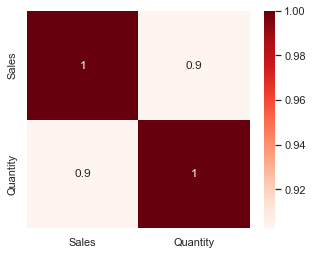

In [135]:
#I Know this doses not show much it shows that 
hm = lastTable3.corr()
fig = plt.figure(figsize = (5,4))
sns.heatmap(hm,cmap = 'Reds', annot = True)

In [136]:
lastTable4 = pd.get_dummies(lastTable3, columns = ['season','UKorNot'])
lastTable4

,InvoiceNo,Sales,Quantity,season_Autamn,season_Spring,season_Summer,season_Winter,UKorNot_NOT UK,UKorNot_UK
0,536365,139.12,40,0,0,0,1,0,1
7,536366,22.20,12,0,0,0,1,0,1
9,536367,278.73,83,0,0,0,1,0,1
21,536368,70.05,15,0,0,0,1,0,1
25,536369,17.85,3,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
397880,581583,124.60,76,0,0,0,1,0,1
397882,581584,140.64,120,0,0,0,1,0,1
397884,581585,329.05,278,0,0,0,1,0,1
397905,581586,339.20,66,0,0,0,1,0,1


In [144]:
from sklearn.linear_model import LinearRegression


x = lastTable4.drop('Sales',axis =1).values

y = lastTable4['Sales']
#It creates 4 tables:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size =0.8, test_size = 0.2, random_state =15)

lm = LinearRegression(fit_intercept = True )

lm.fit(X_train,Y_train)# this is where we put the betas

Y_pred = lm.predict(X_train)
Y_pred

array([137.43559728, 832.36302229, 177.21033252, ..., 114.01369648,
       629.82672379, 233.5444521 ])

In [145]:
print('the accuracy in testing data is',lm.score(X_test,Y_test))

the accuracy in testing data is 0.44552988772620394


/var/folders/4d/8tkcz58x0md0_v7fj12j6ht80000gn/T/ipykernel_4874/2047417111.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_train.min(), Y_train.max()],


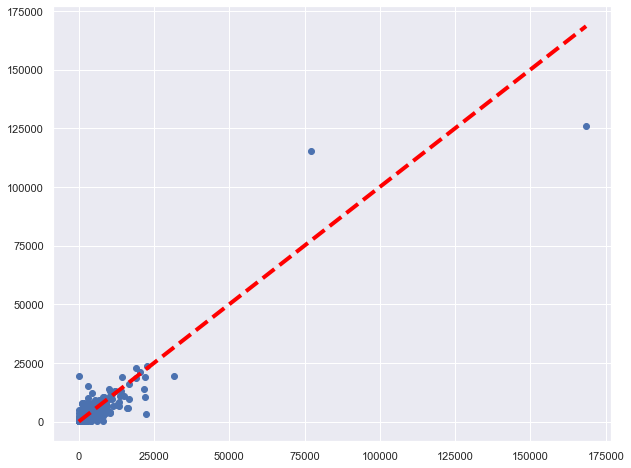

In [146]:
plt.figure(figsize =(10,8))
plt.scatter(Y_train, Y_pred)
plt.plot([Y_train.min(), Y_train.max()], 
         [Y_train.min(), Y_train.max()], 
         'k--', 
         c = 'red',
         lw = 4);

In [147]:
#This shows the coeff for each variable used 
#We can see that there is no significant variable in here that has an incremental affect on sales 
#Maybe we can assume that during WInter we have higher sales since winter has the highest positive coeff.
x2 = lastTable4.drop('Sales',axis =1)

Inter = lm.intercept_
Coeff = lm.coef_
Coeff = Coeff.reshape(-1,8)
Coeff_df = pd.DataFrame(Coeff, columns =  [x2.columns])
Coeff_df

,InvoiceNo,Quantity,season_Autamn,season_Spring,season_Summer,season_Winter,UKorNot_NOT UK,UKorNot_UK
0,0.001016,1.554542,-10.08329,7.673024,-18.123154,20.533421,27.318912,-27.318912
